# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with null values (NaNs).

## Objectives
* Detect missing data in Pandas using .describe(), .summary(), .isnull and .notnull
* Replace/drop missing data in Pandas using .fillna and .dropna


## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `titanic.csv`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Now, let's get started by reading in the data from the .csv file and storing it in a DataFrame in the `df` variable below.  

In [2]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Finding Null Values in a DataFrame

Before we can deal with null values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** null values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [3]:
df.isna()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False


Now we know which columns contain null values, but not how many. 

In the cell below, check chain a different method with `isna()` to check how many total null values are in each column.  

In [4]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64```

Now that we know how many null values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the Column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [5]:
df['Cabin'].isna().value_counts(normalize=True)*100
# 77% of the rows contain missing values

True     77.104377
False    22.895623
Name: Cabin, dtype: float64

With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the data set by using the code you wrote previously.  

In [6]:
df.drop('Cabin', axis=1, inplace=True)
df.head()
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Computing Placeholder Values

Recall that another common strategy for dealing with null values is to replace them with the mean or median for that column.  We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year).   
* Print out the mean and median for the column.  

Mean Value for Age column: 29.69911764705882
Median Value for Age column: 28.0


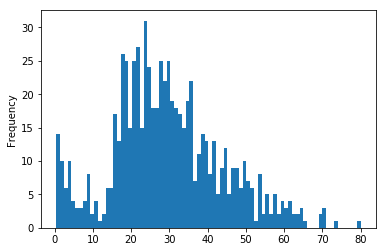

In [7]:
age_mean = df.Age.mean()
age_median = df.Age.median()
df['Age'].plot(kind='hist', bins=80)

print("Mean Value for Age column: {}".format(age_mean))
print("Median Value for Age column: {}".format(age_median))

From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all null values in the `'Age'` column with the median of the column.  **Do not hard code this value--use the methods from pandas or numpy to make this easier!**  Do this replacement in place on the DataFrame. 

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Age'].isna().value_counts()

Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [9]:
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Great! Now we need to deal with the two pesky null values in the `'Embarked'` column.  

### Dropping Rows That Contain Null Values

Perhaps the most common solution to dealing with null values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing null values. Do this in place on the DataFrame.  

In [10]:
df.dropna(inplace=True)

Great! We've dealt with all the **_obvious_** null values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing Values with Placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [11]:
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Survived'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
male      577
female    312
Name: Sex, dtype: int64
3    469
1    200
2    172
?     48
Name: Pclass, dtype: int64
0    549
1    340
Name: Survived, dtype: int64


It Looks like the `'Pclass'` column contains some missing values denoted by a placeholder! 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these null values using whichever strategy you believe is most appropriate in this case.  

        count       mean        std  min    25%      50%        75%       max
Pclass                                                                       
1       200.0  84.767625  79.577726  0.0  31.00  60.2875  96.731250  512.3292
2       172.0  20.636434  13.220960  0.0  13.00  14.2500  26.000000   73.5000
3       469.0  13.525701  11.481836  0.0   7.75   8.0500  15.500000   69.5500
?        48.0  35.154250  46.541729  0.0   8.05  20.7625  32.415625  227.5250
AxesSubplot(0.125,0.125;0.775x0.755)


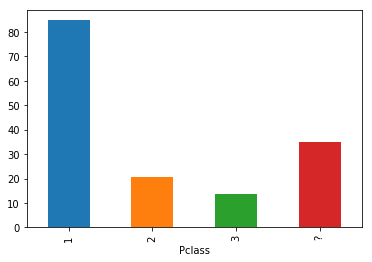

In [17]:
print(df.groupby(['Pclass'])['Fare'].describe())
print(df.groupby(['Pclass'])['Fare'].mean().plot(kind = 'bar'))


In [23]:
df.loc[df['Fare'] < 22, "Ticket Value"] = "3" 
df.loc[(df['Fare'] > 22) & (df['Fare'] <= 39), 'Ticket Value'] = '2'
df.loc[df['Fare'] > 39, 'Ticket Value'] = '1'
df.groupby(['Ticket Value'])['Pclass'].value_counts()

Ticket Value  Pclass
1             1         140
              3          24
              ?          10
              2           9
2             2          61
              1          54
              3          43
              ?          13
3             3         402
              2         102
              ?          25
              1           6
Name: Pclass, dtype: int64

In [24]:
df.groupby(['Pclass', 'Ticket Value'])['Fare'].value_counts()
df['Pclass'] = df['Ticket Value']
df['Pclass'].isna().sum()

0

In [25]:
df.drop('Ticket Value', axis=1, inplace=True)
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Write your answer below this line:
______________________________________________________________________________________________________

- Missing values may not be random - in which case it is important to understand why the bias exists in the dataset (i.e., why values are missing and if they indicate any interesting or significant relationships in the data)
- Certain statistical methods are sensitive to missing values, and removing or replacing them means that we will get more valid results.
- Removing means you lose data, replacing means you add noise or bias results (potentially).
- I chose to use the 'Fare' variable to determine the likely class of the missing data. There were fairly distinct price categoies for the various classes, and I felt that this would yield the most accurate replacement of the missing data. 


Now, let's do a final check to ensure that there are no more null values remaining in this dataset.  

In the cell below, resuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [26]:
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great! Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky null values that will mess up our analysis later on!

## Summary

In this lab, we learned:
* How to detect null values in our dataset
* How to deal with null values by dropping rows
* How to deal with null values by imputing mean/median values 
* Strategies for detecting null values encoded with a placeholder